In [1]:
# importing basic library
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#importing all the required dataset
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test_share.csv')
qset=pd.read_csv('/content/Qset_tats.csv')
geo=pd.read_csv('/content/Geo_scores.csv')
lambda_=pd.read_csv('/content/Lambda_wts.csv')
instance=pd.read_csv('/content/instance_scores.csv')


In [3]:
train_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [4]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [5]:
geo.value_counts().head()

id      geo_score
243071   6.55        4
200448   2.41        4
238279  -6.55        4
86030    9.31        4
100147   6.55        4
dtype: int64

In [6]:
lambda_.value_counts().head()

Group   lambda_wt
Grp0    -0.31        1
Grp576  -11.54       1
Grp583  -7.42        1
Grp582   2.47        1
Grp581  -7.51        1
dtype: int64

In [7]:
qset.value_counts().head()

id      qsets_normalized_tat
20744   -3.79                   4
54563   -4.48                   4
131992   0.34                   4
123604   4.48                   4
11855   -6.55                   4
dtype: int64

In [8]:
instance.value_counts().head()

id      instance_scores
35197   -0.48              4
3844    -0.32              4
182246   0.96              4
117028   0.96              4
191960   0.60              4
dtype: int64

In [9]:
# checking the null value
geo.isnull().sum()

id               0
geo_score    71543
dtype: int64

In [10]:
lambda_.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [11]:
instance.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [12]:
qset.isnull().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

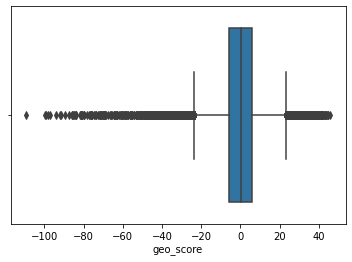

In [13]:
# we have null values in geo and qset
#plotting boxplot to see outliers
sns.boxplot(x='geo_score',data=geo,orient='h')

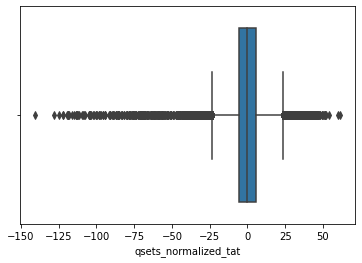

In [14]:
sns.boxplot(x='qsets_normalized_tat',data=qset)

In [15]:
# imputing the missing value with median
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())

In [16]:
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [17]:
geo.isnull().sum()

id           0
geo_score    0
dtype: int64

In [18]:
qset.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

In [19]:
geo=geo.groupby('id').mean()

In [20]:
geo.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [21]:
qset=qset.groupby('id').mean()
qset.head()

,qsets_normalized_tat
id,
0,0.214
1,-0.110
2,1.110
3,-0.676
4,-0.240


In [22]:
instance=instance.groupby('id').mean()
instance.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [23]:
train_data['data']='train'

In [24]:
test_data['data']='test'

In [25]:
train_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0,train


In [26]:
train_data.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
data              0
dtype: int64

In [27]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,test
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,test


In [28]:
test_data.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
data              0
dtype: int64

In [29]:
# lets merge train and test data
all_data=pd.concat([train_data,test_data],axis=0)

In [30]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [31]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [32]:
all_data.shape

(284807, 29)

# Now merge all the data with train and test data

In [33]:
all_data=pd.merge(all_data,geo,on='id',how='left')

In [34]:
all_data=pd.merge(all_data,instance,on='id',how='left')

In [35]:
all_data=pd.merge(all_data,qset,how='left',on='id')

In [36]:
all_data=pd.merge(all_data,lambda_,how='left',on="Group")

In [37]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284807 non-null  int64  
 1   Group                 284807 non-null  object 
 2   Per1                  284807 non-null  float64
 3   Per2                  284807 non-null  float64
 4   Per3                  284807 non-null  float64
 5   Per4                  284807 non-null  float64
 6   Per5                  284807 non-null  float64
 7   Per6                  284807 non-null  float64
 8   Per7                  284807 non-null  float64
 9   Per8                  284807 non-null  float64
 10  Per9                  284807 non-null  float64
 11  Dem1                  284807 non-null  float64
 12  Dem2                  284807 non-null  float64
 13  Dem3                  284807 non-null  float64
 14  Dem4                  284807 non-null  float64
 15  

In [39]:
all_data.isnull().sum()

id                          0
Group                       0
Per1                        0
Per2                        0
Per3                        0
Per4                        0
Per5                        0
Per6                        0
Per7                        0
Per8                        0
Per9                        0
Dem1                        0
Dem2                        0
Dem3                        0
Dem4                        0
Dem5                        0
Dem6                        0
Dem7                        0
Dem8                        0
Dem9                        0
Cred1                       0
Cred2                       0
Cred3                       0
Cred4                       0
Cred5                       0
Cred6                       0
Normalised_FNT              0
Target                  56962
data                        0
geo_score                   0
instance_scores             0
qsets_normalized_tat        0
lambda_wt                   0
dtype: int

In [40]:
train_data=all_data[all_data['data']=='train']


In [41]:
test_data=all_data[all_data['data']=='test']

In [42]:
train_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.256,-0.06,-0.700,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.250,0.52,0.140,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.950,1.56,-0.430,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.490,0.70,-0.302,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.850,-0.47,-0.630,0.60


In [43]:
x=train_data.drop(['id','Group','Target','data'],axis=1)
y=train_data['Target']

In [44]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.06,-0.700,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.52,0.140,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,1.56,-0.430,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,0.70,-0.302,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.47,-0.630,0.60


In [45]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Target, dtype: float64

In [46]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x_sc

array([[ 6.17603382e-01, -1.59949449e-01, -3.67953077e-01, ...,
        -5.48582452e-02, -8.24950841e-01, -1.36070832e-01],
       [-2.94547070e-01,  9.82969984e-01,  4.28587917e-01, ...,
         4.76527663e-01,  1.63090340e-01,  6.88602704e-01],
       [ 7.09328008e-01, -9.56345437e-01,  5.53664602e-01, ...,
         1.42935757e+00, -5.07366176e-01, -5.32749242e-01],
       ...,
       [ 6.02315944e-01,  1.62256561e-01,  4.74668801e-01, ...,
        -1.18991027e-01,  1.01792044e-02,  1.56218522e-01],
       [-3.55696821e-01,  6.30367180e-01,  9.81558524e-01, ...,
        -6.04567805e-01,  4.50092778e-01,  1.59678748e+00],
       [ 5.20782943e-01, -2.08584319e-01,  5.53664602e-01, ...,
        -2.01447461e-01,  6.45348535e-01, -3.65060454e-04]])

In [47]:
x_sc=pd.DataFrame(x_sc)
x_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.617603,-0.159949,-0.367953,0.211843,1.228044,2.982542,-0.786549,0.855995,0.536498,-0.606800,...,1.699950,1.530275,-0.395173,0.148061,0.058750,-0.287254,0.247680,-0.054858,-0.824951,-0.136071
1,-0.294547,0.982970,0.428588,1.617345,0.129918,-0.091573,0.344195,0.291510,-1.300520,-0.577426,...,0.117386,-0.612816,0.019414,-0.834050,-0.120443,-0.323573,-0.259523,0.476528,0.163090,0.688603
2,0.709328,-0.956345,0.553665,-1.151282,-1.271637,0.380791,-1.468203,0.225099,-1.200485,-0.019317,...,-1.399237,0.554403,0.019414,0.148061,0.058750,-0.083466,-0.961188,1.429358,-0.507366,-0.532749
3,-0.044852,0.770192,0.165269,0.579109,0.166041,-0.721392,0.697051,-0.082047,-0.491141,1.263355,...,0.892183,-1.397341,-0.913407,1.326595,0.835249,-0.352265,0.482237,0.641441,-0.356808,0.751236
4,-0.162056,0.630367,-0.144132,-0.529754,0.231062,-0.466465,0.448448,0.324715,-0.409294,0.264633,...,-0.690380,-0.842433,0.309624,0.295378,0.058750,-0.316753,0.843093,-0.430493,-0.742614,0.625969


In [48]:
y.value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [49]:
# the target variable is highly imbalance , so before building a model ,it is a good approach to balance the data
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_sc,y)

In [50]:
print(x_smote.shape)
print(y_smote.shape)

(454902, 29)
(454902,)


In [51]:
y_smote.value_counts()

0.0    227451
1.0    227451
Name: Target, dtype: int64

# splitting the data into train and test

In [52]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x_smote,y_smote,train_size=0.75,random_state=101)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(341176, 29)
(341176,)
(113726, 29)
(113726,)


# Model Building

In [53]:
# WE have a very huge datasets,so we will use Deep Neural Network this time.
import tensorflow as tf
from tensorflow import keras

In [54]:
# setting up the model input layer
tf.random.set_seed(100)
tf.keras.backend.clear_session()
model=None
model=tf.keras.models.Sequential()


In [55]:
# building the first hidden layer
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
#building the second hidden layer
model.add(tf.keras.layers.Dense(units=10,activation='relu'))
#building the output layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))


In [56]:
# training the model by using Multi layer Perceptron concept
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
# training the dataset and use backpropagation method to fit the model
model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),batch_size=100)

Epoch 1/10
3412/3412 [==============================] - 9s 3ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0101 - val_accuracy: 0.9978
Epoch 2/10
3412/3412 [==============================] - 11s 3ms/step - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 3/10
3412/3412 [==============================] - 8s 2ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 4/10
3412/3412 [==============================] - 9s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 5/10
3412/3412 [==============================] - 8s 2ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/10
3412/3412 [==============================] - 9s 3ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 7/10
3412/3412 [==============================] - 9s 3ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1500      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Prediction
y_pred=model.predict(test_x)
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_pred,test_y))

[[56699     4]
 [  125 56898]]


In [61]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     56703
        True       1.00      1.00      1.00     57023

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [62]:
print(accuracy_score(y_pred,test_y))

0.9988656947399891


# Prediction of actual test data

In [63]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.796667,0.823333,0.783333,-249.7500,NaN,test,0.25,-0.04,-0.426,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.630000,0.673333,0.673333,-249.8125,NaN,test,0.43,-0.77,-0.620,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.596667,0.680000,0.670000,-248.1200,NaN,test,1.32,0.11,-0.406,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.320000,0.676667,0.660000,-222.9875,NaN,test,-2.11,0.33,0.374,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.546667,0.650000,0.663333,-196.2200,NaN,test,-2.11,-0.37,-0.130,1.89


In [64]:
test_data=test_data.drop(['data'],axis=1)

In [65]:
test_data=test_data.drop(['Target'],axis=1)

In [66]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


In [67]:
test_data1=test_data.drop(['id','Group'],axis=1)

In [68]:
test_data1.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


In [69]:
# Feaute scaling of test data
test_sc=sc.fit_transform(test_data1)
test_sc=pd.DataFrame(test_sc)
test_sc.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.496031,1.570058,-0.893190,-2.005630,-0.212044,-0.913347,0.086224,1.063427,0.721904,-1.503455,...,0.723101,0.641604,0.815166,1.205872,1.131651,-0.339607,0.238999,-0.037541,-0.505784,0.792116
1,-0.055545,0.520338,0.282944,-0.423586,0.535501,-0.928426,0.938507,-0.307743,-0.337788,-0.688414,...,0.174728,0.816024,-0.223190,0.048338,0.068690,-0.340572,0.417906,-0.714570,-0.735087,0.188701
2,0.577239,0.138622,0.382617,0.720570,-0.182729,-0.106653,-0.089246,0.048067,-0.200758,1.717428,...,0.423989,1.184244,-0.430861,0.099784,0.036479,-0.314450,1.302504,0.101575,-0.482144,0.407179
3,0.947650,-0.648668,-0.182194,-0.063389,-0.900958,-0.272515,-0.774414,-0.012681,1.343103,1.530852,...,-0.307175,-1.218874,-2.154532,0.074061,-0.060154,0.073448,-2.106675,0.305611,0.439797,1.874103
4,0.798457,-0.600954,-0.381539,0.423937,-0.505199,0.036592,-0.473608,0.048067,2.220090,1.609411,...,1.138536,-0.579335,-0.742368,-0.131723,-0.027943,0.486580,-2.106675,-0.343595,-0.155919,1.967736


In [79]:
# prediction of Target variable of the test data
target=model.predict(test_sc)
target=(target>0.5)
target

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [82]:
Outcome=pd.DataFrame(target)
Outcome.head()


,0
0,False
1,False
2,False
3,False
4,False


In [85]:
Outcome[0]=Outcome[0].astype(int)

In [103]:
Outcome['target']=Outcome

In [104]:
Outcome.head()

,0,target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [105]:
Outcome.tail()

,0,target
56957,0,0
56958,0,0
56959,0,0
56960,0,0
56961,0,0


In [106]:
Outcome['target'].value_counts()

0    56778
1      184
Name: target, dtype: int64

In [107]:
Outcome.shape

(56962, 2)

In [102]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89


In [112]:
test_data['result1']=Outcome['target'].values

In [114]:
test_data=test_data.drop(['result'],axis=1)

In [115]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,instance_scores,qsets_normalized_tat,lambda_wt,result1
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.04,-0.426,0.76,0
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.77,-0.620,0.18,0
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,0.11,-0.406,0.39,0
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.33,0.374,1.80,0
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.37,-0.130,1.89,0


In [116]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56962 entries, 227845 to 284806
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56962 non-null  int64  
 1   Group                 56962 non-null  object 
 2   Per1                  56962 non-null  float64
 3   Per2                  56962 non-null  float64
 4   Per3                  56962 non-null  float64
 5   Per4                  56962 non-null  float64
 6   Per5                  56962 non-null  float64
 7   Per6                  56962 non-null  float64
 8   Per7                  56962 non-null  float64
 9   Per8                  56962 non-null  float64
 10  Per9                  56962 non-null  float64
 11  Dem1                  56962 non-null  float64
 12  Dem2                  56962 non-null  float64
 13  Dem3                  56962 non-null  float64
 14  Dem4                  56962 non-null  float64
 15  Dem5         

In [120]:
test_data.to_excel('final_test_outcome.xlsx')